### Clone the Yolov5 repository from gitub

In [ ]:
# !git clone https://github.com/ultralytics/yolov5

### Import the necessary libraries

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

### Check the computation device

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


### Load the yolov5s model from torch hub

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\user/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-10-30 Python-3.9.13 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


### Testing the official yolov5 model

In [4]:
image = cv2.imread('_MG_0790.JPG')

In [5]:
result = model(image)
result.print()

image 1/1: 3456x5184 8 persons, 6 cars, 1 motorcycle
Speed: 15.0ms pre-process, 311.0ms inference, 2.0ms NMS per image at shape (1, 3, 448, 640)


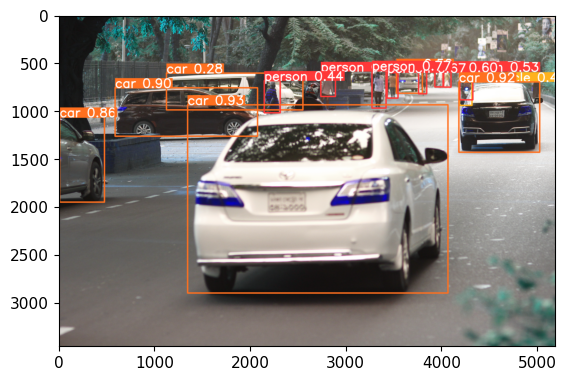

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

### Training the yolov5 model with the custom dataset

In [22]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 1 --data data.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=1, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-230-g53efd07f Python-3.9.13 torch-2.0.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=

In [23]:
model01 = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/best.pt')

Using cache found in C:\Users\user/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-10-30 Python-3.9.13 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


### Testing the newly trained model

In [24]:
image = cv2.imread('_MG_0790.JPG')
result = model01(image)
result.print()

image 1/1: 3456x5184 (no detections)
Speed: 6.0ms pre-process, 389.0ms inference, 3.0ms NMS per image at shape (1, 3, 448, 640)


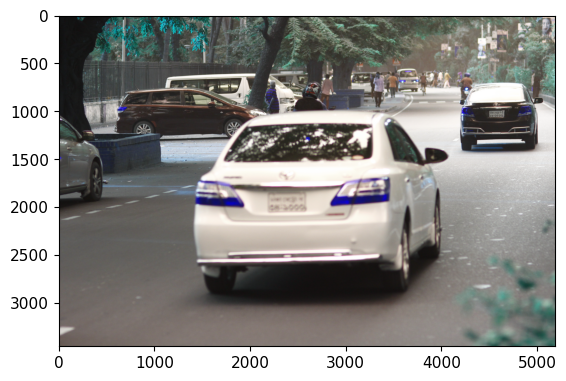

In [25]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()

In [ ]:
# new temp block